In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
 df = pd.read_csv('./zomato.csv',encoding='latin-1')
 df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [ ]:
df.shape

(9551, 21)

In [ ]:
# df.columns
# df.describe() - only int columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
## Missing Values

In [ ]:
# [feature for feature in df.columns if df[feature].isnull().sum()>0]
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [3]:
df_c=pd.read_excel('./Country-Code.xlsx')
df_c.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
final_df=pd.merge(df,df_c,on='Country Code',how='left')
final_df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [ ]:
## To check data type
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [ ]:
final_df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

We can conclude main base of Zomato is in India

In [ ]:
country_names = final_df['Country'].value_counts().index
country_val = final_df['Country'].value_counts().values

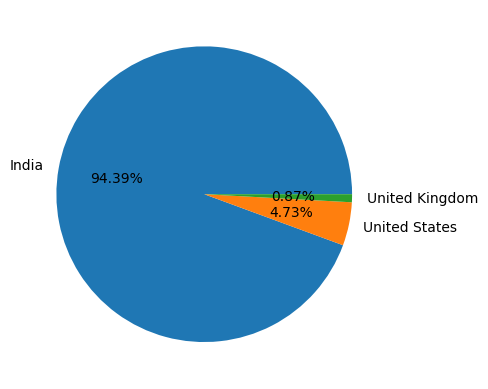

In [ ]:
## Pie Chart: For top 3 countries that use Zomato
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.show()

In [ ]:
# final_df.groupby(by=['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'}).head()
ratings = final_df.groupby(by=['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


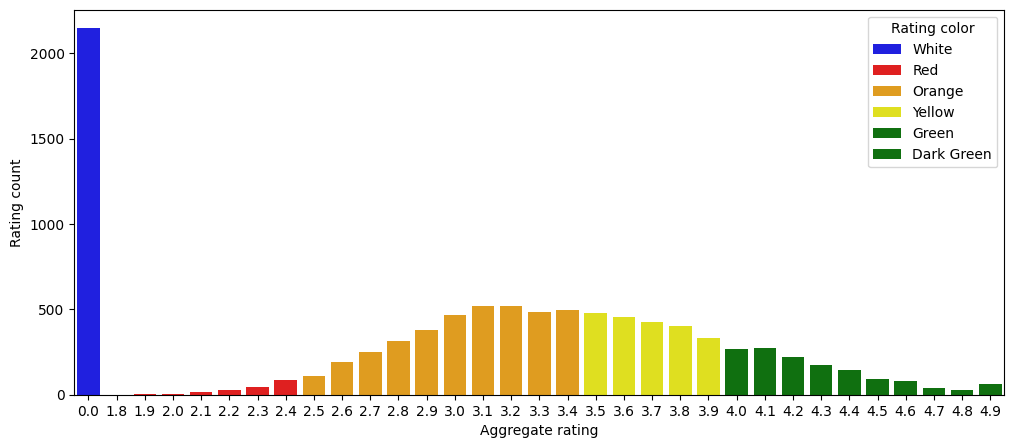

In [ ]:
plt.figure(figsize=(12,5))

sns.barplot(x='Aggregate rating',y='Rating count', data=ratings, hue='Rating color',palette=['blue','red','orange','yellow','green','green'])

plt.show()

1. Not rated count is high
2. Max no. of ratings is in [2.5, 3.4]

<ipython-input-55-1b17a163c62e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

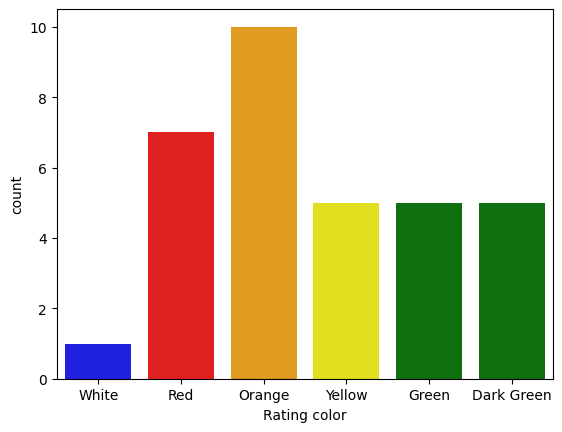

In [ ]:
sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])


In [ ]:
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Max 0 rating given in India

In [ ]:
final_df[['Country','Currency']].groupby(by=['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [ ]:
final_df[final_df['Has Online delivery']=='No']['Country'].value_counts()

India             6229
United States      434
United Kingdom      80
Brazil              60
South Africa        60
New Zealand         40
Turkey              34
UAE                 32
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

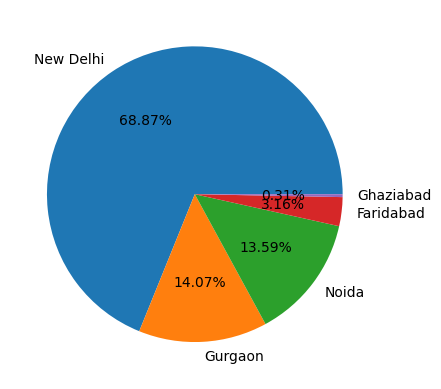

In [ ]:
city_values=final_df['City'].value_counts().values[:5]
city_labels=final_df['City'].value_counts().index[:5]

plt.pie(city_values, labels=city_labels, autopct='%1.2f%%')

plt.show()

In [5]:
final_df['Cuisines'].value_counts()[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

The Most economical places to order food from in Delhi (New Delhi, Gurgaon, Noida, Faridabad, Ghaziabad)



In [6]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [13]:
delhi_cities=['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad']

In [28]:
delhi_df=final_df[final_df['City'].isin(delhi_cities)].reset_index()
delhi_df.drop(['index','Country Code','Latitude','Longitude','Currency','Country'],axis=1, inplace=True)
delhi_df.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,301728,Desire Foods,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad","Chinese, Fast Food, Bakery",250,No,No,No,No,1,2.9,Orange,Average,4
1,5992,Knight Rock,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad","North Indian, Chinese",500,No,No,No,No,2,2.8,Orange,Average,16


In [43]:
delhi_df=delhi_df[(delhi_df['Is delivering now']=='Yes')].reset_index()
delhi_df.drop(['index','level_0'],axis=1, inplace=True)
delhi_df.drop(['Has Online delivery','Is delivering now'],axis=1, inplace=True)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18204847,Cake 24x7,Gurgaon,"S-27/9, Shop 5, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",Bakery,600,No,Yes,Yes,No,2,3.3,Orange,Average,25
1,18294819,Cake Point,Gurgaon,"U-1/29, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon","Bakery, Desserts",600,No,Yes,Yes,No,2,2.9,Orange,Average,7


In [48]:
delhi_df.shape

(33, 15)

In [49]:
delhi_df.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18204847,Cake 24x7,Gurgaon,"S-27/9, Shop 5, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",Bakery,600,No,No,2,3.3,Orange,Average,25
1,18294819,Cake Point,Gurgaon,"U-1/29, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon","Bakery, Desserts",600,No,No,2,2.9,Orange,Average,7


In [52]:
delhi_df['Econ Factor']=delhi_df['Aggregate rating']/delhi_df['Average Cost for two']
delhi_df.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Econ Factor
0,18204847,Cake 24x7,Gurgaon,"S-27/9, Shop 5, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",Bakery,600,No,No,2,3.3,Orange,Average,25,0.005500
1,18294819,Cake Point,Gurgaon,"U-1/29, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon","Bakery, Desserts",600,No,No,2,2.9,Orange,Average,7,0.004833


In [53]:
print(delhi_df['Econ Factor'].mean())
print(delhi_df['Econ Factor'].median())

0.005166397677282844
0.005


In [54]:
delhi_df['Econ Factor']=delhi_df['Econ Factor']*(10**4)

In [55]:
delhi_df.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Econ Factor
0,18204847,Cake 24x7,Gurgaon,"S-27/9, Shop 5, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",Bakery,600,No,No,2,3.3,Orange,Average,25,55.000000
1,18294819,Cake Point,Gurgaon,"U-1/29, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon","Bakery, Desserts",600,No,No,2,2.9,Orange,Average,7,48.333333


In [63]:
delhi_df=delhi_df.sort_values(by=['Econ Factor', 'Votes'], ascending=False).reset_index()
delhi_df.drop(['index','level_0'],axis=1, inplace=True)

In [70]:
delhi_df.head(5)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Econ Factor
0,312576,Munch Nation,New Delhi,"Model Town 1, New Delhi",Model Town 1,"Model Town 1, New Delhi","Chinese, Fast Food",350,No,No,1,3.8,Yellow,Good,727,108.571429
1,18439516,Brother's Snacks and Shakes,Gurgaon,"Shop 3, Near Artemis Hospital, Sector 57, Gurgaon",Sector 57,"Sector 57, Gurgaon",Fast Food,300,No,No,1,3.2,Orange,Average,12,106.666667
2,313304,Chaayos,New Delhi,"26, 1st Floor, Hauz Khas Village, New Delhi",Hauz Khas Village,"Hauz Khas Village, New Delhi","Cafe, Tea",400,No,No,1,3.9,Yellow,Good,454,97.500000
3,18289257,Hungry Minister,Noida,"Sector 18 ,Noida",Sector 18,"Sector 18, Noida","Continental, Mexican, Fast Food, Chinese",400,No,No,1,3.5,Yellow,Good,147,87.500000
4,18381230,Hungry Minister,Noida,"Shop 6, Gautam Budh Nagar, Sector 41, Noida",Sector 41,"Sector 41, Noida","Continental, Mexican, Fast Food, Chinese",400,No,No,1,3.5,Yellow,Good,29,87.500000


In [81]:
## Answer
delhi_df[['Restaurant Name','Cuisines']][:7]

,Restaurant Name,Cuisines
0,Munch Nation,"Chinese, Fast Food"
1,Brother's Snacks and Shakes,Fast Food
2,Chaayos,"Cafe, Tea"
3,Hungry Minister,"Continental, Mexican, Fast Food, Chinese"
4,Hungry Minister,"Continental, Mexican, Fast Food, Chinese"
5,Aurangzeb Rd,"North Indian, Mughlai"
6,Grandma's Kitchen,"North Indian, South Indian"
